In [1]:
### Keras and Tensorflow for Stock Price Prediction 

In [1]:
!pip install pandas_datareader


In [10]:
import pandas_datareader as pdr

In [11]:

df = pdr.get_data_yahoo('KO')

In [12]:
df.to_csv('KO.csv')
import pandas as pd

In [5]:
df = pd.read_csv('KO.csv')

In [13]:
df_d = df.reset_index()['Date']

In [14]:
df_d

0      2015-08-31
1      2015-09-01
2      2015-09-02
3      2015-09-03
4      2015-09-04
          ...    
1253   2020-08-21
1254   2020-08-24
1255   2020-08-25
1256   2020-08-26
1257   2020-08-27
Name: Date, Length: 1258, dtype: datetime64[ns]

In [8]:
df_h = df.reset_index()['High']

In [9]:
df_h

0       39.450001
1       39.029999
2       39.070000
3       39.340000
4       38.790001
          ...    
1253    47.500000
1254    47.980000
1255    48.049999
1256    48.180000
1257    48.820000
Name: High, Length: 1258, dtype: float64

In [15]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-31,39.450001,39.060001,39.150002,39.320000,12673300.0,33.363338
2015-09-01,39.029999,38.540001,38.669998,38.750000,23703200.0,32.879696
2015-09-02,39.070000,38.560001,39.029999,38.900002,14054800.0,33.006969
2015-09-03,39.340000,38.840000,38.900002,39.160000,13311600.0,33.227581
2015-09-04,38.790001,38.380001,38.680000,38.520000,15450500.0,32.684536


In [16]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-21,47.500000,46.970001,47.340000,47.279999,14734100.0,47.279999
2020-08-24,47.980000,47.180000,47.430000,47.970001,9257700.0,47.970001
2020-08-25,48.049999,47.650002,48.000000,47.910000,7827800.0,47.910000
2020-08-26,48.180000,47.470001,47.759998,48.160000,10124200.0,48.160000
2020-08-27,48.820000,48.200001,48.250000,48.230000,10930400.0,48.230000


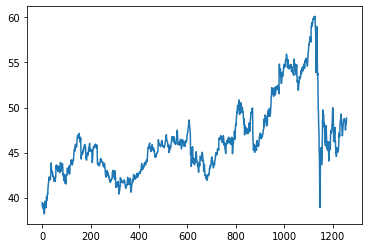

In [17]:
import matplotlib.pyplot as plt
plt.plot(df_h)

In [18]:
import numpy as np

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_h = scaler.fit_transform(np.array(df_h).reshape(-1,1))

In [20]:
df_h.shape

(1258, 1)

In [21]:
len(df_h)

1258

In [22]:
df_h

array([[0.05742944],
       [0.03828624],
       [0.04010943],
       ...,
       [0.44940745],
       [0.45533275],
       [0.48450319]])

In [23]:
trng_size = int(len(df_h) * 0.7)
test_size = len(df_h) - trng_size
train_data = df_h[0:trng_size, :]
test_data = df_h[trng_size:len(df_h), :1] 

In [24]:
len(train_data)

880

In [25]:
import numpy 
def create_dataset(dataset, time_step=1):
    dataX = []
    dataY = []
    for i in range(len(dataset) - time_step - 1 ):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [26]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [27]:
print(x_train)

[[0.05742944 0.03828624 0.04010943 ... 0.15633546 0.15132176 0.18459447]
 [0.03828624 0.04010943 0.05241574 ... 0.15132176 0.18459447 0.19644489]
 [0.04010943 0.05241574 0.02734741 ... 0.18459447 0.19644489 0.19644489]
 ...
 [0.36463077 0.37192338 0.38149507 ... 0.32133101 0.35186875 0.35369194]
 [0.37192338 0.38149507 0.38103918 ... 0.35186875 0.35369194 0.33637193]
 [0.38149507 0.38103918 0.35141304 ... 0.35369194 0.33637193 0.31677302]]


In [28]:
print(x_train.shape), print(y_train.shape)

(779, 100)
(779,)


(None, None)

In [29]:
print(x_test.shape), print(y_test.shape)

(277, 100)
(277,)


(None, None)

In [30]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [32]:
model = Sequential()
model.add(LSTM(60, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(60, return_sequences = True))
model.add(LSTM(60))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 60)           14880     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           29040     
_________________________________________________________________
lstm_2 (LSTM)                (None, 60)                29040     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 73,021
Trainable params: 73,021
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 60)           14880     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           29040     
_________________________________________________________________
lstm_2 (LSTM)                (None, 60)                29040     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 73,021
Trainable params: 73,021
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
13/13 [==============================] - 5s 397ms/step - loss: 0.0208 - val_loss: 0.0705
Epoch 2/100
13/13 [==============================] - 3s 243ms/step - loss: 0.0043 - val_loss: 0.0339
Epoch 3/100
13/13 [==============================] - 4s 282ms/step - loss: 0.0027 - val_loss: 0.0214
Epoch 4/100
13/13 [==============================] - 4s 276ms/step - loss: 0.0023 - val_loss: 0.0176
Epoch 5/100
13/13 [==============================] - 3s 259ms/step - loss: 0.0021 - val_loss: 0.0164
Epoch 6/100
13/13 [==============================] - 4s 285ms/step - loss: 0.0018 - val_loss: 0.0139
Epoch 7/100
13/13 [==============================] - 4s 305ms/step - loss: 0.0018 - val_loss: 0.0140
Epoch 8/100
13/13 [==============================] - 4s 302ms/step - loss: 0.0018 - val_loss: 0.0141
Epoch 9/100
13/13 [==============================] - 4s 294ms/step - loss: 0.0017 - val_loss: 0.0129
Epoch 10/100
13/13 [==============================] - 4s 273ms/step - loss: 0.0017 - val_lo

In [36]:
import tensorflow as tf

In [37]:
predict_train = model.predict(x_train)
predict_test = model.predict(x_test)


In [38]:
predict_train = scaler.inverse_transform(predict_train)
predict_test = scaler.inverse_transform(predict_test)

In [39]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, predict_train))

44.48090880962813

In [40]:
math.sqrt(mean_squared_error(y_test, predict_test))

50.80123746317651

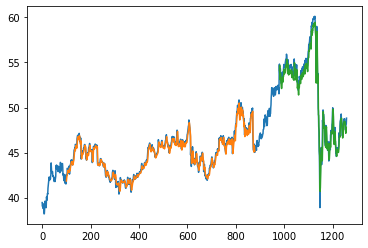

In [41]:
### Plotting
# Shifts train predictions for Plotting 
look_back = 100
trainPredictPlot = numpy.empty_like(df_h)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back: len(predict_train) + look_back: ] = predict_train
# Shifts train predictions for Plotting 
testPredictPlot = numpy.empty_like(df_h)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(predict_train) + (look_back*2)  + 1: len(df_h) - 1, : ] = predict_test
plt.plot(scaler.inverse_transform(df_h))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [42]:
len(test_data)

378

In [43]:
X_input = test_data[278:].reshape(1, -1)
X_input.shape

(1, 100)

In [44]:
temp_input=list(X_input)
temp_input = temp_input[0].tolist()

In [45]:
temp_input

[0.4744757834559694,
 0.4512306483245938,
 0.5259799285048619,
 0.47629897903829344,
 0.5041021031254784,
 0.4653601532833518,
 0.440291648700152,
 0.4608021643275424,
 0.4471285451991158,
 0.3969918837717161,
 0.36280774901589874,
 0.36052866760324376,
 0.3445761409316628,
 0.4006381010668636,
 0.4471285451991158,
 0.440747534530483,
 0.4015496988580254,
 0.3737465747708404,
 0.33226983155522793,
 0.36052866760324376,
 0.33910672805419173,
 0.32133100580028673,
 0.3659982543502154,
 0.36098455343357516,
 0.3491339560179716,
 0.3003646043425654,
 0.2675479532082403,
 0.2962625012170865,
 0.32816772842974995,
 0.3254331089257647,
 0.3637191729375604,
 0.3600729556424134,
 0.32452151113460337,
 0.3983591935237092,
 0.40565180198350337,
 0.4225159264462466,
 0.4102096170698122,
 0.4120328126521362,
 0.4143117201952906,
 0.4525979580765864,
 0.4594348545755502,
 0.5150411027499202,
 0.5369189281293036,
 0.519598917836229,
 0.5050137009166402,
 0.4434821540344682,
 0.36736556410220755,
 0.3

In [46]:
from numpy import array 

output_lst = []
n_steps = 100
i = 0
while (i < 30):
    if(len(temp_input)>100):
        #print(temp_input)
        X_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input=X_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(X_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        output_lst.extend(yhat.tolist())
        i=i+1
    else:
        X_input = X_input.reshape((1, n_steps,1))
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        output_lst.extend(yhat.tolist())
        i=i+1
print(output_lst)


[0.46677834]
101
1 day input [0.45123065 0.52597993 0.47629898 0.5041021  0.46536015 0.44029165
 0.46080216 0.44712855 0.39699188 0.36280775 0.36052867 0.34457614
 0.4006381  0.44712855 0.44074753 0.4015497  0.37374657 0.33226983
 0.36052867 0.33910673 0.32133101 0.36599825 0.36098455 0.34913396
 0.3003646  0.26754795 0.2962625  0.32816773 0.32543311 0.36371917
 0.36007296 0.32452151 0.39835919 0.4056518  0.42251593 0.41020962
 0.41203281 0.41431172 0.45259796 0.45943485 0.5150411  0.53691893
 0.51959892 0.5050137  0.44348215 0.36736556 0.37648137 0.43299904
 0.40428449 0.40337289 0.43755703 0.36280775 0.36918876 0.33044664
 0.30948041 0.31084772 0.29079309 0.30264369 0.33454874 0.32999092
 0.32269832 0.33318143 0.31859621 0.31267091 0.32178672 0.34138564
 0.35323606 0.41020962 0.38742019 0.3974476  0.39380138 0.44667283
 0.47082957 0.47310847 0.48359159 0.47037368 0.50546941 0.46991797
 0.45761166 0.43664543 0.41795811 0.39516869 0.41385601 0.42570643
 0.45077494 0.45989057 0.47675486

In [54]:
train_day = np.arange(1, 101)
test_day = np.arange(101, 131) 

In [55]:
import matplotlib.pyplot as plt 

In [56]:
len(df_h)

1258

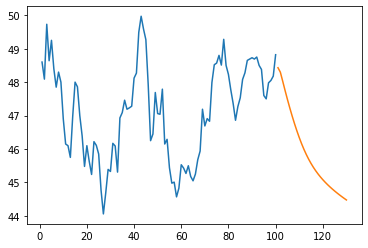

In [59]:
plt.plot(train_day,scaler.inverse_transform(df_h[1158:]))
plt.plot(test_day,scaler.inverse_transform(output_lst))

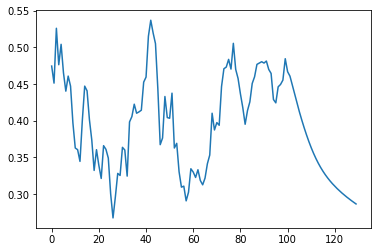

In [60]:
df_final = df_h.tolist()
df_final.extend(output_lst)
plt.plot(df_final[1158:])

In [61]:
df_final = scaler.inverse_transform(df_final).tolist()

In [62]:
df_final 

[[39.45000076293945],
 [39.02999877929688],
 [39.06999969482422],
 [39.34000015258789],
 [38.790000915527344],
 [39.02999877929688],
 [39.209999084472656],
 [38.650001525878906],
 [38.18999862670898],
 [38.22000122070313],
 [38.63000106811523],
 [39.18999862670898],
 [39.61000061035156],
 [39.29999923706055],
 [39.310001373291016],
 [38.9900016784668],
 [38.88000106811523],
 [39.20000076293945],
 [40.08000183105469],
 [39.81999969482422],
 [39.709999084472656],
 [40.22999954223633],
 [40.47000122070313],
 [40.38999938964844],
 [41.04999923706055],
 [41.34000015258789],
 [41.61000061035156],
 [41.9900016784668],
 [42.11999893188477],
 [42.290000915527344],
 [41.90999984741211],
 [41.959999084472656],
 [42.02999877929688],
 [42.209999084472656],
 [42.060001373291016],
 [42.400001525878906],
 [42.52000045776367],
 [43.849998474121094],
 [43.310001373291016],
 [42.88999938964844],
 [42.77000045776367],
 [42.84000015258789],
 [42.900001525878906],
 [42.86000061035156],
 [42.36000061035156],

In [63]:
df_final[1258:]

[[48.43111650104765],
 [48.297916756306215],
 [48.028291106653334],
 [47.75167958443125],
 [47.48453142178368],
 [47.22985046545181],
 [46.98823303851531],
 [46.759855683991184],
 [46.54524868479347],
 [46.345185560881866],
 [46.160295982350355],
 [45.99077676196975],
 [45.83629835277497],
 [45.69607284981975],
 [45.568959915986845],
 [45.45363613251174],
 [45.34871073273825],
 [45.25281779680517],
 [45.164697330661504],
 [45.08321618968329],
 [45.00738246366017],
 [44.936353977014726],
 [44.86942390381591],
 [44.80600638279247],
 [44.745614939853105],
 [44.6878559494562],
 [44.632409672582064],
 [44.57901325629427],
 [44.5274522335203],
 [44.47755267669526]]

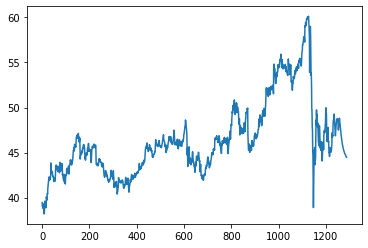

In [64]:
plt.plot(df_final)

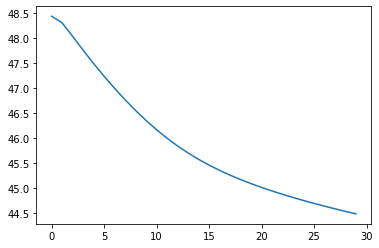

In [65]:
plt.plot(df_final[1258:])